# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.cluster import KMeans
import os

os.chdir("E:/EBAC/Material/Proyecto empresa aliada entregable 1")

Importacion de bases de datos limpiadas y pre procesadas en la actividad anterior

In [2]:
productSales = pd.read_csv('productSales.csv')
calendarSales = pd.read_csv('calendarSales.csv')

productCatSeg = pd.read_csv('productCatSeg.csv')
productCatSeg.head()

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,CATEGORY_NAME,FORMAT1,FORMAT2,ATTR1,ATTR2,ATTR3,SEGMENT
0,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH
1,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH
2,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH
3,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,GEL,CLORO,CLORO,CLORO,BLEACH
4,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH


In [3]:
# Filtrar marcas VANISH

vanishBrands = productCatSeg["BRAND"].unique()
vanishBrands = [brand for brand in vanishBrands if "VANISH" in brand.upper()]
vanishBrands

['VANISH PODER 02', 'VANISH', 'VANISH CRYSTAL WHITE', 'VANISH EXTRA HIGIENE']

In [4]:
# Filtrar DF para enfocarnos solo en productos VANISH

vanishProductCatSeg = productCatSeg[productCatSeg["BRAND"].str.contains("VANISH")]

In [5]:
vanishproductSales = productSales[productSales["BRAND"].str.contains("VANISH")]
vanishproductSales.info()
vanishproductSales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475604 entries, 884 to 6344103
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   WEEK                         1475604 non-null  object 
 1   YEAR                         1475604 non-null  int64  
 2   MONTH                        1475604 non-null  int64  
 3   WEEK_NUMBER                  1475604 non-null  int64  
 4   DATE                         1475604 non-null  object 
 5   ITEM                         1475604 non-null  object 
 6   TOTAL_UNIT_SALES             1475604 non-null  float64
 7   TOTAL_VALUE_SALES            1475604 non-null  float64
 8   TOTAL_UNIT_AVG_WEEKLY_SALES  1475604 non-null  float64
 9   REGION                       1475604 non-null  object 
 10  MANUFACTURER                 1475604 non-null  object 
 11  BRAND                        1475604 non-null  object 
 12  ITEM_DESCRIPTION             1475604 non

,WEEK,YEAR,MONTH,WEEK_NUMBER,DATE,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,...,BRAND,ITEM_DESCRIPTION,CATEGORY,CATEGORY_NAME,FORMAT1,FORMAT2,ATTR1,ATTR2,ATTR3,SEGMENT
884,01-22,2022,1,1,2022-01-09,7501058716422,0.033,2.2,2.357,TOTAL AUTOS AREA 6,...,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,FABRIC TREATMENT and SANIT\r\n,POLVO,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,BLEACH
885,01-22,2022,1,1,2022-01-09,7501058716422,0.033,2.2,2.357,TOTAL AUTOS AREA 6,...,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,FABRIC TREATMENT and SANIT\r\n,POLVO,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,BLEACH
886,01-22,2022,1,1,2022-01-09,7501058716422,0.033,2.2,2.357,TOTAL AUTOS AREA 6,...,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,FABRIC TREATMENT and SANIT\r\n,POLVO,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,BLEACH
887,01-22,2022,1,1,2022-01-09,7501058716422,0.033,2.2,2.357,TOTAL AUTOS AREA 6,...,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,FABRIC TREATMENT and SANIT\r\n,POLVO,GEL,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,BLEACH
888,01-22,2022,1,1,2022-01-09,7501058716422,0.033,2.2,2.357,TOTAL AUTOS AREA 6,...,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,FABRIC TREATMENT and SANIT\r\n,POLVO,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,BLEACH


In [6]:
vanishproductSales = vanishproductSales[['TOTAL_UNIT_SALES', 'CATEGORY', 'REGION', 'ATTR1', 'ATTR2', 'ATTR3' ]]
vanishproductSales.head()

,TOTAL_UNIT_SALES,CATEGORY,REGION,ATTR1,ATTR2,ATTR3
884,0.033,1,TOTAL AUTOS AREA 6,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH
885,0.033,1,TOTAL AUTOS AREA 6,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH
886,0.033,1,TOTAL AUTOS AREA 6,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH
887,0.033,1,TOTAL AUTOS AREA 6,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH
888,0.033,1,TOTAL AUTOS AREA 6,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH


In [7]:
# Convertir strings a valores numericos
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
vanishproductSales['REGION_Encoded'] = le.fit_transform(vanishproductSales['REGION'])
vanishproductSales['ATTR1_Encoded'] = le.fit_transform(vanishproductSales['ATTR1'])
vanishproductSales['ATTR2_Encoded'] = le.fit_transform(vanishproductSales['ATTR2'])
vanishproductSales['ATTR3_Encoded'] = le.fit_transform(vanishproductSales['ATTR3'])
vanishproductSales.head()

,TOTAL_UNIT_SALES,CATEGORY,REGION,ATTR1,ATTR2,ATTR3,REGION_Encoded,ATTR1_Encoded,ATTR2_Encoded,ATTR3_Encoded
884,0.033,1,TOTAL AUTOS AREA 6,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,5,1,0,1
885,0.033,1,TOTAL AUTOS AREA 6,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,5,1,0,1
886,0.033,1,TOTAL AUTOS AREA 6,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,5,1,0,1
887,0.033,1,TOTAL AUTOS AREA 6,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,5,1,0,1
888,0.033,1,TOTAL AUTOS AREA 6,SAFE BLEACH,FABRIC TREATMENT,SAFE BLEACH,5,1,0,1


In [8]:
# Seleccionamos solo columnas numericas

vanishproductSales = vanishproductSales[['TOTAL_UNIT_SALES', 'CATEGORY', 'REGION_Encoded', 'ATTR1_Encoded', 'ATTR2_Encoded', 'ATTR3_Encoded' ]]
vanishproductSales.head()

,TOTAL_UNIT_SALES,CATEGORY,REGION_Encoded,ATTR1_Encoded,ATTR2_Encoded,ATTR3_Encoded
884,0.033,1,5,1,0,1
885,0.033,1,5,1,0,1
886,0.033,1,5,1,0,1
887,0.033,1,5,1,0,1
888,0.033,1,5,1,0,1


In [11]:
# Escalado de los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
VanishScaled = scaler.fit_transform(vanishproductSales)
VanishScaled



array([[-0.3656363 ,  0.        ,  0.94366694,  0.20270758,  0.        ,
         0.20270758],
       [-0.3656363 ,  0.        ,  0.94366694,  0.20270758,  0.        ,
         0.20270758],
       [-0.3656363 ,  0.        ,  0.94366694,  0.20270758,  0.        ,
         0.20270758],
       ...,
       [-0.04213901,  0.        ,  1.4364702 ,  0.20270758,  0.        ,
         0.20270758],
       [-0.04213901,  0.        ,  1.4364702 ,  0.20270758,  0.        ,
         0.20270758],
       [-0.04213901,  0.        ,  1.4364702 ,  0.20270758,  0.        ,
         0.20270758]])

In [12]:
# Cargamos K-means
import warnings
warnings.filterwarnings("ignore")

wcss = []
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state=2)
    kmeans.fit(VanishScaled)

    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

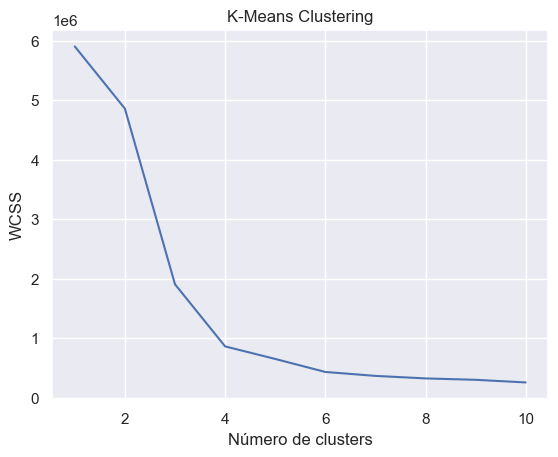

In [13]:
# Graficación del "Codo de Jambu"
sb.set()
mp.plot(range(1,11), wcss)
mp.title("K-Means Clustering")
mp.xlabel("Número de clusters")
mp.ylabel("WCSS")

In [14]:
# Aqui podemos ver que el numero optimo de clusters es de 4

In [15]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state=42)
cluster_values = kmeans.fit_predict(VanishScaled)
print(cluster_values)

[3 3 3 ... 3 3 3]


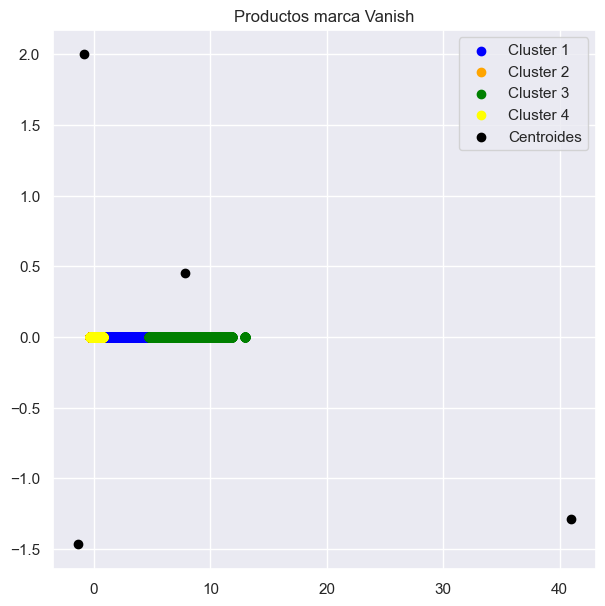

In [24]:
mp.figure(figsize=(7,7))
mp.scatter(VanishScaled[cluster_values==0,0], VanishScaled[cluster_values==0,1],c = 'blue', label = "Cluster 1")
mp.scatter(VanishScaled[cluster_values==1,0], VanishScaled[cluster_values==1,1],c = 'orange', label = "Cluster 2")
mp.scatter(VanishScaled[cluster_values==2,0], VanishScaled[cluster_values==2,1],c = 'green', label = "Cluster 3")
mp.scatter(VanishScaled[cluster_values==3,0], VanishScaled[cluster_values==3,1],c = 'yellow', label = "Cluster 4")


mp.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'black', label = 'Centroides')

mp.title("Productos marca Vanish")
mp.legend()
mp.show()

In [33]:
# Utilizamos PCA para mejorar los resultados

VanishPCA = vanishproductSales.iloc[:,:].values

print(VanishPCA)

[[0.033 1.    5.    ... 0.    1.    1.   ]
 [0.033 1.    5.    ... 0.    1.    1.   ]
 [0.033 1.    5.    ... 0.    1.    1.   ]
 ...
 [1.729 1.    6.    ... 0.    1.    1.   ]
 [1.729 1.    6.    ... 0.    1.    1.   ]
 [1.729 1.    6.    ... 0.    1.    1.   ]]


In [35]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(VanishScaled)
VanishScaled = pca.transform(VanishScaled)
VanishScaled

array([[0.28382648, 0.39179739],
       [0.28382648, 0.39179739],
       [0.28382648, 0.39179739],
       ...,
       [0.32668679, 0.96807484],
       [0.32668679, 0.96807484],
       [0.32668679, 0.96807484]])

In [36]:
wcss2 = []
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state=2)
    kmeans.fit(VanishScaled)

    wcss2.append(kmeans.inertia_)
    

TypeError: 'str' object is not callable

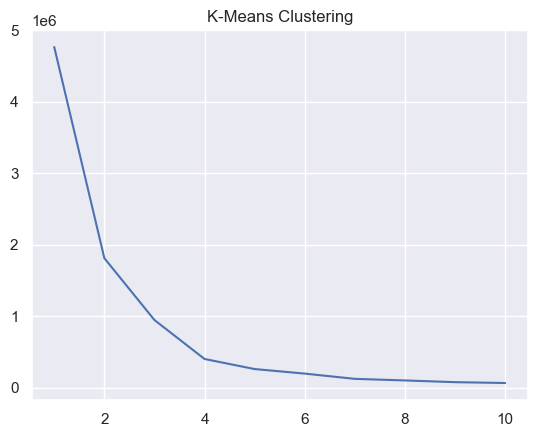

In [37]:
# Graficación del "Codo de Jambu"
sb.set()
mp.plot(range(1,11), wcss2)
mp.title("K-Means Clustering")
mp.xlabel("Número de clusters")
mp.ylabel("WCSS") # Weighted Cluster sum of squares
mp.show()

In [38]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state=42)
cluster_values = kmeans.fit_predict(VanishScaled)
print(cluster_values)

[3 3 3 ... 3 3 3]


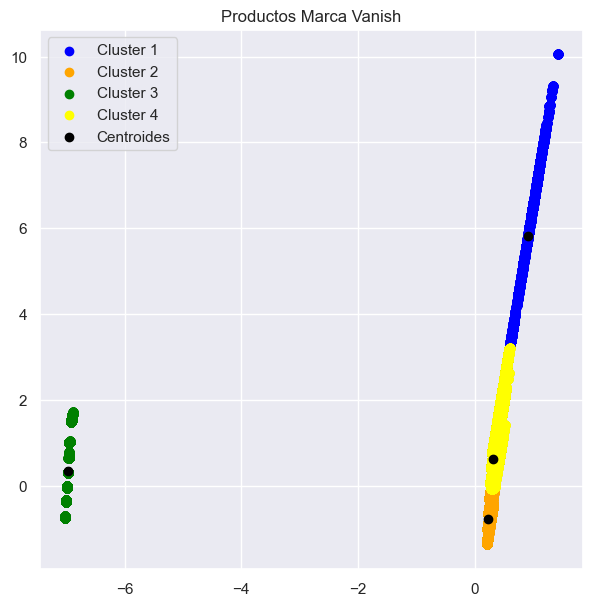

In [39]:
mp.figure(figsize=(7,7))
mp.scatter(VanishScaled[cluster_values==0,0], VanishScaled[cluster_values==0,1],c = 'blue', label = "Cluster 1")
mp.scatter(VanishScaled[cluster_values==1,0], VanishScaled[cluster_values==1,1],c = 'orange', label = "Cluster 2")
mp.scatter(VanishScaled[cluster_values==2,0], VanishScaled[cluster_values==2,1],c = 'green', label = "Cluster 3")
mp.scatter(VanishScaled[cluster_values==3,0], VanishScaled[cluster_values==3,1],c = 'yellow', label = "Cluster 4")

mp.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'black', label = 'Centroides')

mp.title("Productos Marca Vanish")
mp.legend()
mp.show()

Podemos observar que existe una alta relacion entre las ventas totales de cada producto con los atributos que los definen, esto nos ayudaria para sacar provecho de un atributo de los productos o para reestructurar la estrategia utilizada con algun atributo que no se este desempeñando de la manera adecuada